In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
from matplotlib.dates import WeekdayLocator
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima
import mgarch
import yfinance as yf
import arch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#creating the gold ETF data frame
gold_etf = yf.Ticker('GLD')
df_goldetf = gold_etf.history(start="2020-03-01",  end="2020-12-31")
df_goldetf.index = pd.to_datetime(df_goldetf.index)
df_goldetf = df_goldetf.sort_index(ascending = True)
df_goldetf = df_goldetf.astype(float)
#print(df_goldetf.index)
df_goldetf.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-02,150.00,150.73,149.04,149.20,16295400.0,0.0,0.0
2020-03-03,150.84,155.24,150.74,153.89,28687700.0,0.0,0.0
2020-03-04,154.40,154.96,153.70,154.16,12315500.0,0.0,0.0
2020-03-05,156.06,157.62,155.72,157.49,17973500.0,0.0,0.0
2020-03-06,158.33,159.25,154.54,157.55,26973400.0,0.0,0.0


In [ ]:
#creating the equity ETF dataframe
equity_etf = yf.Ticker('CSUK.L')
df_equityetf = equity_etf.history(start="2020-03-01",  end="2020-12-31")
df_equityetf.index = pd.to_datetime(df_equityetf.index)
df_equityetf = df_equityetf.sort_index(ascending = True)
df_equityetf = df_equityetf.astype(float)
df_equityetf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-02,10090.0,10230.0,9890.0,10100.0,1629.0,0.0,0.0
2020-03-03,10236.0,10338.0,10236.0,10176.0,4437.0,0.0,0.0
2020-03-04,10368.0,10408.0,10306.0,10332.0,4675.0,0.0,0.0
2020-03-05,10384.0,10384.0,10164.0,10231.0,14929.0,0.0,0.0
2020-03-06,10040.0,10062.0,9834.0,9854.0,2880.0,0.0,0.0


In [ ]:
#creating the bitcoin dataframe
bitcoin = yf.Ticker('BTC-USD')
df_bitcoin = bitcoin.history(start="2020-03-01",  end="2020-12-31")
df_bitcoin.index = pd.to_datetime(df_bitcoin.index)
df_bitcoin = df_bitcoin.sort_index(ascending = True)
df_bitcoin = df_bitcoin.astype(float)
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-29,8671.21,8775.63,8599.51,8599.51,3.579239e+10,0.0,0.0
2020-03-01,8599.76,8726.80,8471.21,8562.45,3.534916e+10,0.0,0.0
2020-03-02,8563.26,8921.31,8532.63,8869.67,4.285767e+10,0.0,0.0
2020-03-03,8865.39,8901.60,8704.99,8787.79,4.238672e+10,0.0,0.0
2020-03-04,8788.54,8843.37,8712.43,8755.25,3.474671e+10,0.0,0.0


In [ ]:
#Daily return on gold etf and equity etf
df_goldetf_daily_return = pd.DataFrame(np.log(df_goldetf['Close']/df_goldetf['Close'].shift(1)).iloc[1:].rename('Gold ETF Daily Returns'))
df_equityetf_daily_return = pd.DataFrame(np.log(df_equityetf['Close']/df_equityetf['Close'].shift(1)).iloc[1:].rename('Equity ETF Daily Returns'))
df_bitcoin_daily_return = pd.DataFrame(np.log(df_bitcoin['Close']/df_bitcoin['Close'].shift(1)).iloc[1:].rename('Bitcoin-USD daily Returns'))

In [ ]:
df_gold_avg = df_goldetf['Close'].rolling(20).mean().loc['Apr-2020':'Dec-2020']
df_equity_avg = df_equityetf['Close'].rolling(20).mean().loc['Apr-2020':'Dec-2020']
df_bitcoin_avg = df_bitcoin['Close'].rolling(20).mean().loc['Apr-2020':'Dec-2020']

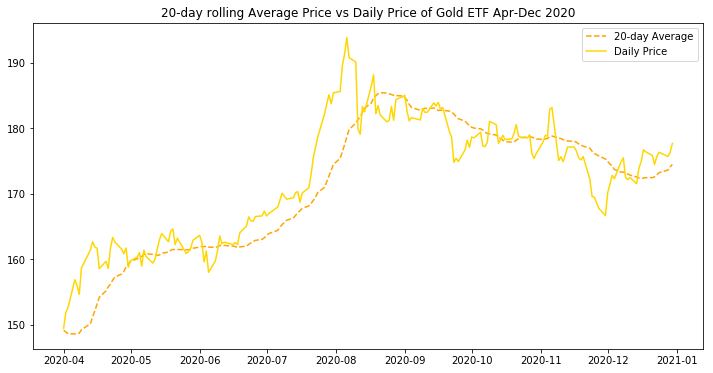

In [ ]:
#20-day moving average price of your GOLD ETF.

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('20-day rolling Average Price vs Daily Price of Gold ETF Apr-Dec 2020')
ax.plot(df_gold_avg, label = '20-day Average', linestyle = '--', color = 'orange')
ax.plot(df_goldetf['Close'].loc['Apr-2020':'Dec-2020'], label = 'Daily Price', color = 'gold')
ax.legend()
plt.show()


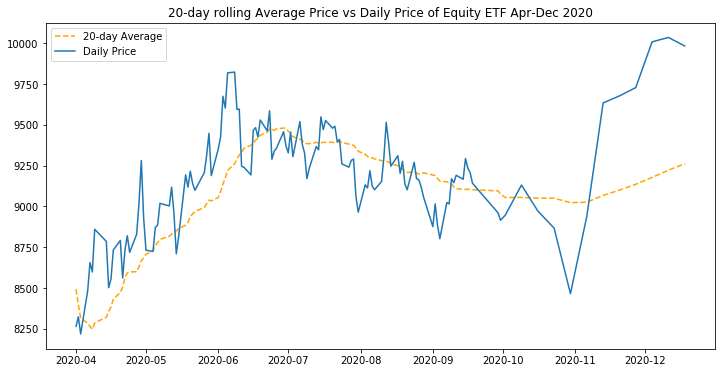

In [ ]:
#20-day moving average price of your Equity ETF.
#df_equity_avg = df_equityetf['Close'].rolling(20).mean()
#df_equity_avg = df_equity_avg.loc['Apr-2020':'Dec-2020']
#df_equity_avg.plot(title = '20-day rolling Average Price of Equity ETF Apr-Dec 2020');

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('20-day rolling Average Price vs Daily Price of Equity ETF Apr-Dec 2020')
ax.plot(df_equity_avg, label = '20-day Average', linestyle = '--', color = 'orange')
ax.plot(df_equityetf['Close'].loc['Apr-2020':'Dec-2020'], label = 'Daily Price')
ax.legend()
plt.show()

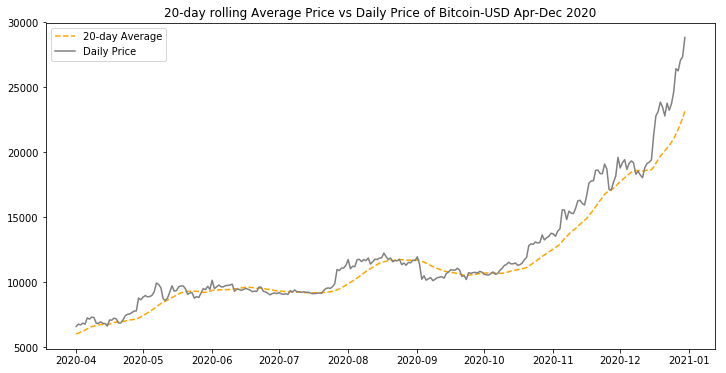

In [ ]:
#20-day moving average price of your Equity ETF.
df_bitcoin_avg = df_bitcoin['Close'].rolling(20).mean()
df_bitcoin_avg = df_bitcoin_avg.loc['Apr-2020':'Dec-2020']
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('20-day rolling Average Price vs Daily Price of Bitcoin-USD Apr-Dec 2020')
ax.plot(df_bitcoin_avg, label = '20-day Average', linestyle = '--', color = 'orange')
ax.plot(df_bitcoin['Close'].loc['Apr-2020':'Dec-2020'], label = 'Daily Price', color = 'grey')
ax.legend()
plt.show()
#df_bitcoin_avg.plot(title = '20-day rolling Average Price of Bitcoin-USD Apr-Dec 2020');

***We notice that the Gold ETF and the UK MSCI Equity ETF are highly correlated and depict the same behavior, 
however at a different scale. We notice that the Bitcoin-USD is correlated to the remaining two pair, however not to a strong extent***

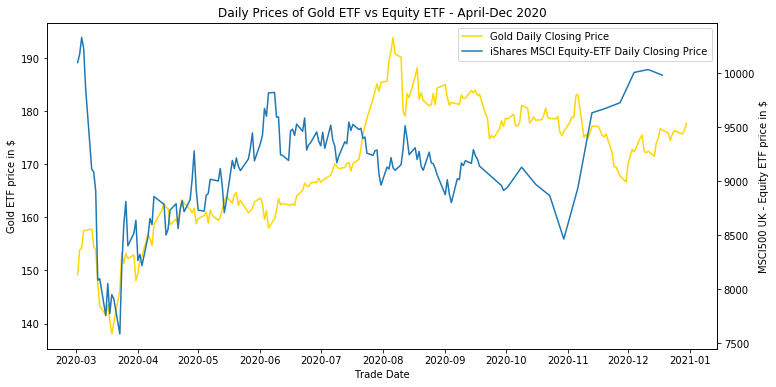

In [ ]:
#'Graph gold and equity prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Daily Prices of Gold ETF vs Equity ETF - April-Dec 2020")
lns1 = ax1.plot(df_goldetf['Close'], color = 'gold', label = "Gold Daily Closing Price")
ax1.set_xlabel("Trade Date")
ax1.set_ylabel("Gold ETF price in $")
ax2 = ax1.twinx()
ax2.set_ylabel("MSCI500 UK - Equity ETF price in $")
lns2 = ax2.plot(df_equityetf['Close'], label = "iShares MSCI Equity-ETF Daily Closing Price")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.show()

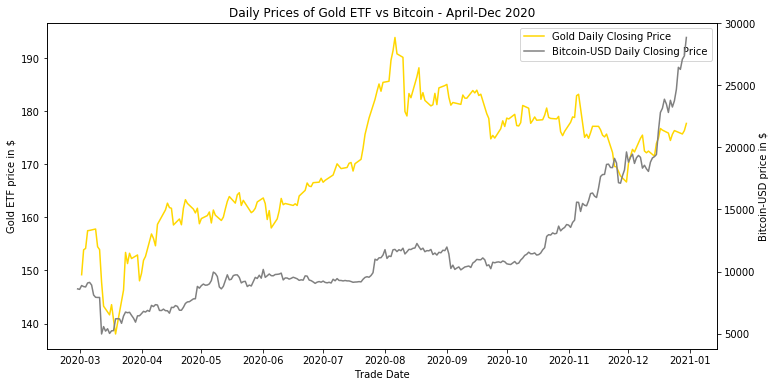

In [ ]:
#Graph gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Daily Prices of Gold ETF vs Bitcoin - April-Dec 2020")
lns1 = ax1.plot(df_goldetf['Close'], color = 'gold', label = "Gold Daily Closing Price")
ax1.set_xlabel("Trade Date")
ax1.set_ylabel("Gold ETF price in $")
ax2 = ax1.twinx()
ax2.set_ylabel("Bitcoin-USD price in $")
lns2 = ax2.plot(df_bitcoin['Close'], color = 'grey', label = "Bitcoin-USD Daily Closing Price")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.show()

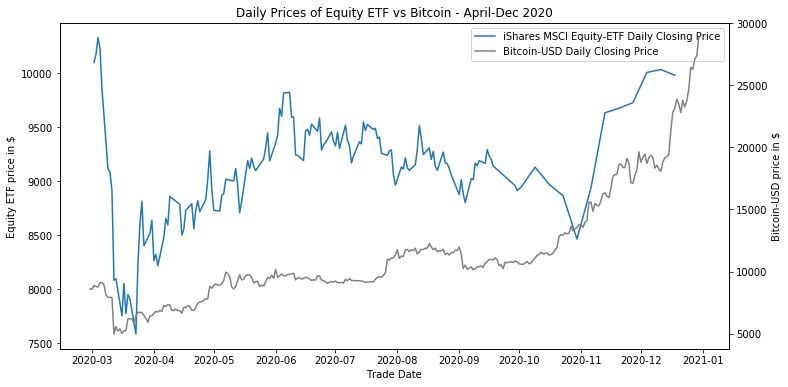

In [ ]:
#'Graph equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Daily Prices of Equity ETF vs Bitcoin - April-Dec 2020")
lns1 = ax1.plot(df_equityetf['Close'], label = "iShares MSCI Equity-ETF Daily Closing Price")
ax1.set_xlabel("Trade Date")
ax1.set_ylabel("Equity ETF price in $")
ax2 = ax1.twinx()
ax2.set_ylabel("Bitcoin-USD price in $")
lns2 = ax2.plot(df_bitcoin['Close'], color = 'grey', label = "Bitcoin-USD Daily Closing Price")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.show()

# 5. 'Fitting a GARCH Model #
## I will be looking into the bitcoin-USD for the purpose of fitting the GARCH model ##
### The autocorrelation plot of bitcoin-USD daily closing price indicates that the time series for bicoin-USD daily prices is non-stationary ###

(3.677599489675925,
 1.0,
 0,
 305,
 {'1%': -3.451973573620699,
  '5%': -2.8710633193086648,
  '10%': -2.5718441306100512},
 4274.2001645571945)

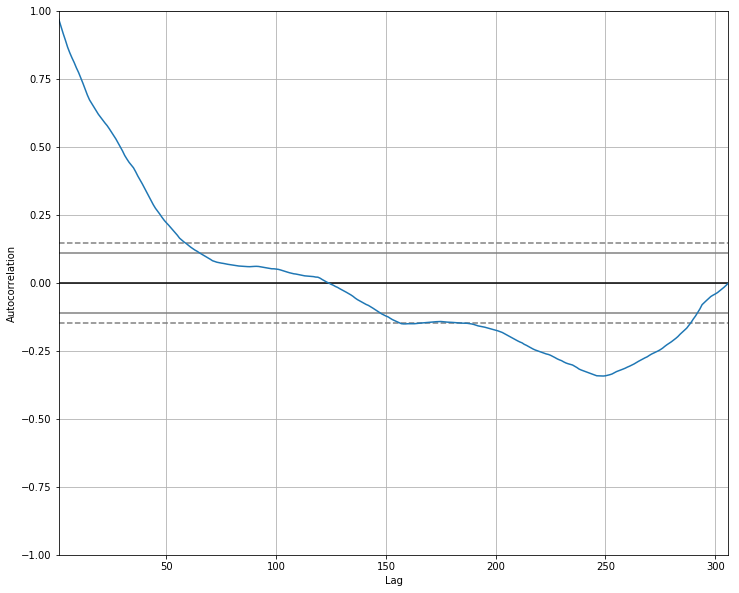

In [ ]:
autocorrelation_plot(df_bitcoin['Close'])
adfuller(df_bitcoin['Close'])

## A review of the autocorrelation plot and the ADF test for the bitcoin daily returns reveals that the daily returns are stationary. Thus the daily returns are eligible for time series modelling ##

(-16.992401493985373,
 8.84941230394406e-30,
 0,
 273,
 {'1%': -3.45453261164607,
  '5%': -2.8721859575020017,
  '10%': -2.572442854861866},
 -1090.3915447644454)

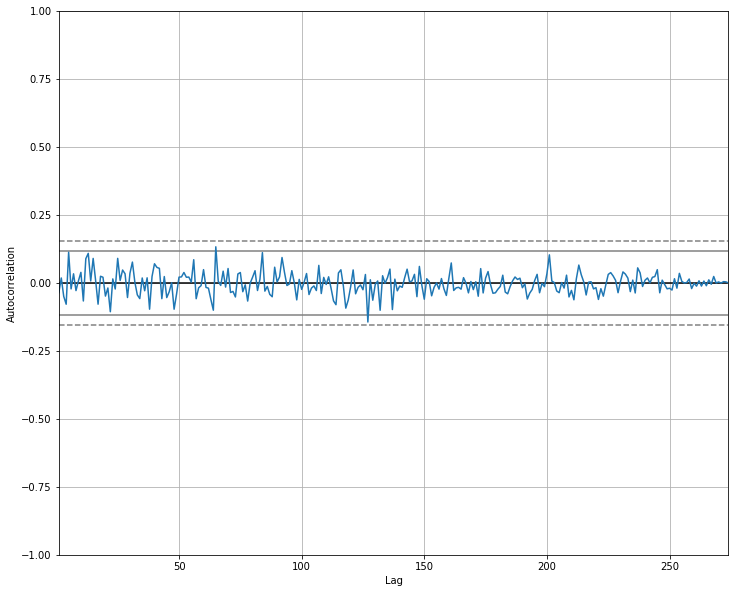

In [ ]:
df_bitcoin_daily_return = df_bitcoin_daily_return.loc['Apr-2020':'Dec-2020']
autocorrelation_plot(df_bitcoin_daily_return)
adfuller(df_bitcoin_daily_return)

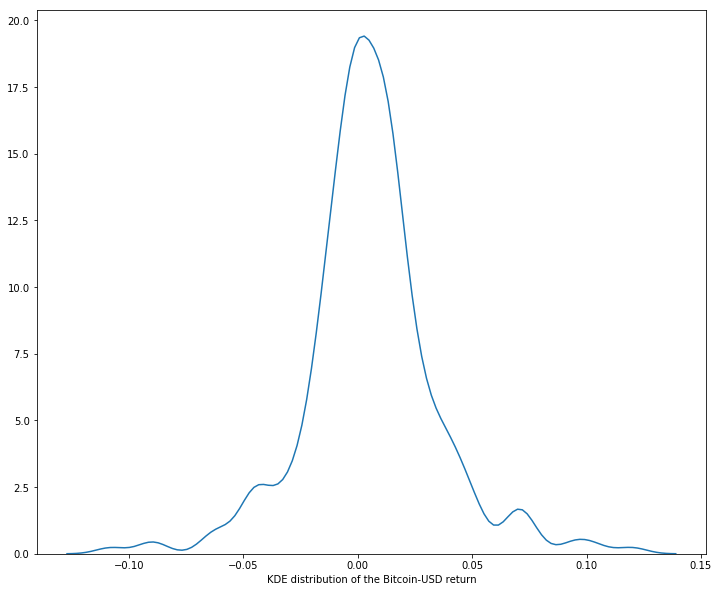

In [ ]:
sns.distplot(df_bitcoin_daily_return, hist=False, axlabel = 'KDE distribution of the Bitcoin-USD return');

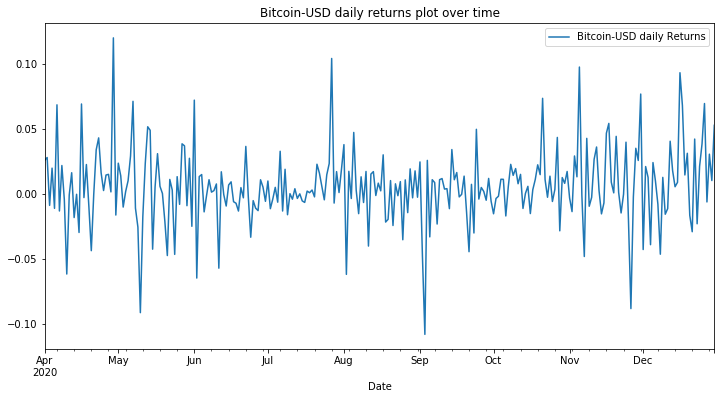

In [ ]:
df_bitcoin_daily_return.plot(title = 'Bitcoin-USD daily returns plot over time', figsize=(12,6));

## Identifying seasonality in the bitcoin daily return ##

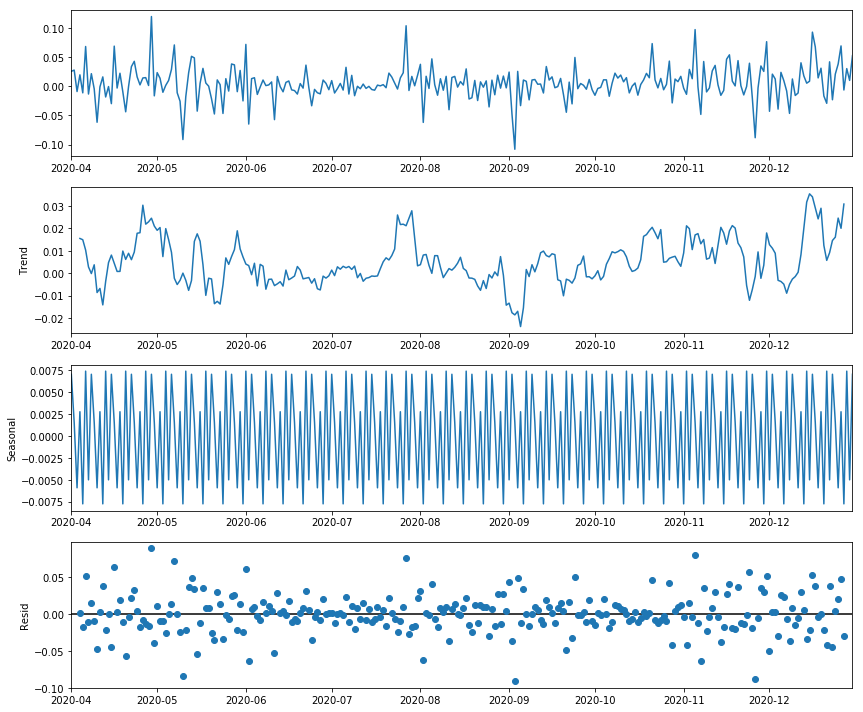

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,10
seasonal_decompose(df_bitcoin_daily_return).plot();

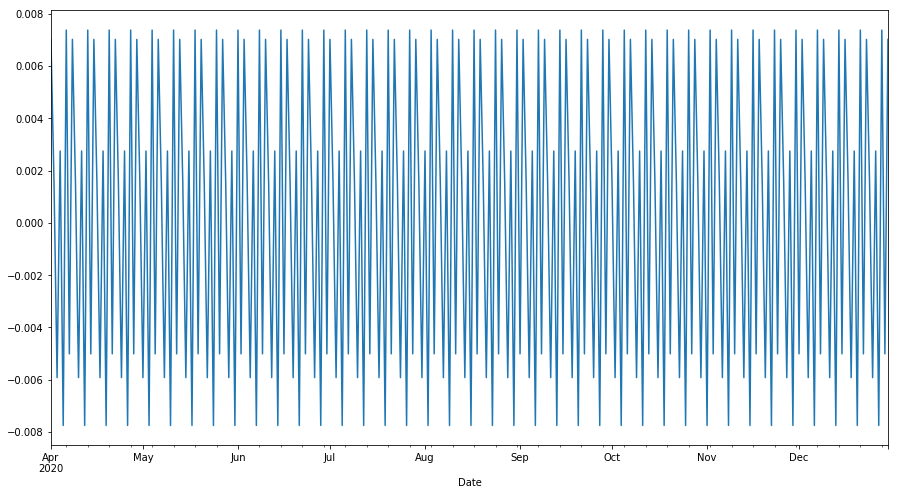

In [ ]:
#Zooming onto the seasonal component
rcParams['figure.figsize'] = 12,6 
sd = seasonal_decompose(df_bitcoin_daily_return)
sd.seasonal.plot(figsize = (15,8));

## We notice that the seasonal component repeats itself about 4 - 4.5 times a month. Thus we use m = 5 as it captures the seasonal component ##

In [ ]:
auto_arima(df_bitcoin_daily_return,trace=True, seasonal=True, m=5).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=-1152.621, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=-1159.359, Time=1.31 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=-1159.112, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=-1158.964, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=-1151.745, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[5] intercept   : AIC=-1160.961, Time=0.13 sec
 ARIMA(0,0,0)(2,0,0)[5] intercept   : AIC=-1159.162, Time=0.31 sec
 ARIMA(0,0,0)(1,0,1)[5] intercept   : AIC=-1160.368, Time=0.28 sec
 ARIMA(0,0,0)(0,0,1)[5] intercept   : AIC=-1160.810, Time=0.12 sec
 ARIMA(0,0,0)(2,0,1)[5] intercept   : AIC=-1159.330, Time=1.00 sec
 ARIMA(0,0,1)(1,0,0)[5] intercept   : AIC=-1159.106, Time=0.31 sec
 ARIMA(1,0,1)(1,0,0)[5] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(1,0,0)[5]             : AIC=-1155.281, Time=0.04 sec

Best model:  ARIMA(0,0,0)(1,0,0)[5] intercept
Total fit time: 4.965 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                  274
Model:             SARIMAX(1, 0, 0, 5)   Log Likelihood                 583.481
Date:                 Mon, 25 Jan 2021   AIC                          -1160.961
Time:                         15:13:43   BIC                          -1150.122
Sample:                              0   HQIC                         -1156.611
                                 - 274                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.002      2.750      0.006       0.001       0.008
ar.S.L5        0.1155      0.070      1.639      0.101      -0.023       0.254
sigma2         0.0008    4.6e-05     17.980      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                88.52
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.16
Prob(H) (two-sided):                  0.95   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

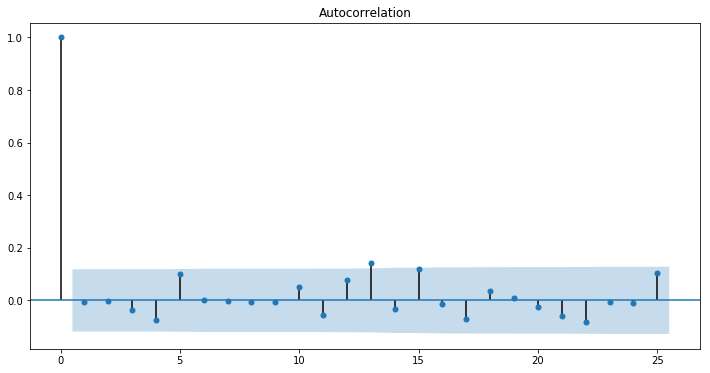

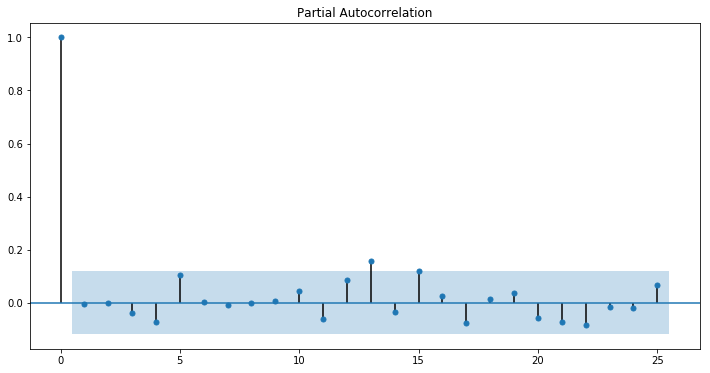

In [ ]:
#Plotting the ACF and PACF from the deseasonalized data
plot_acf(pd.Series(df_bitcoin_daily_return['Bitcoin-USD daily Returns'])-sd.seasonal);
plot_pacf(pd.Series(df_bitcoin_daily_return['Bitcoin-USD daily Returns'])-sd.seasonal);

In [ ]:
sarimabitcoinreturnsfit = SARIMAX(df_bitcoin_daily_return,order=(0,0,0), seasonal_order=(1,0,0,5)).fit()
sarimabitcoinreturnsfit.summary()
#sns.distplot(sarimabitcoinreturnsfit.resid, hist=False);

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Bitcoin-USD daily Returns   No. Observations:                  274
Model:                   SARIMAX(1, 0, 0, 5)   Log Likelihood                 579.641
Date:                       Mon, 25 Jan 2021   AIC                          -1155.281
Time:                               15:15:42   BIC                          -1148.055
Sample:                           04-01-2020   HQIC                         -1152.381
                                - 12-30-2020                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5        0.1433      0.072      1.978      0.048       0.001       0.285
sigma2         0.0009   4.77e-05     17.849      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                87.17
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.16
Prob(H) (two-sided):                  0.79   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

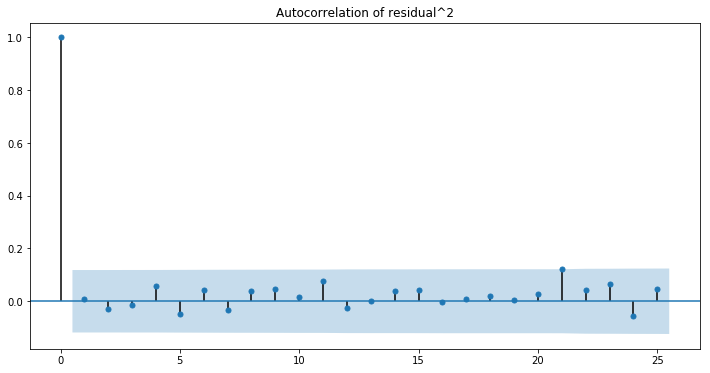

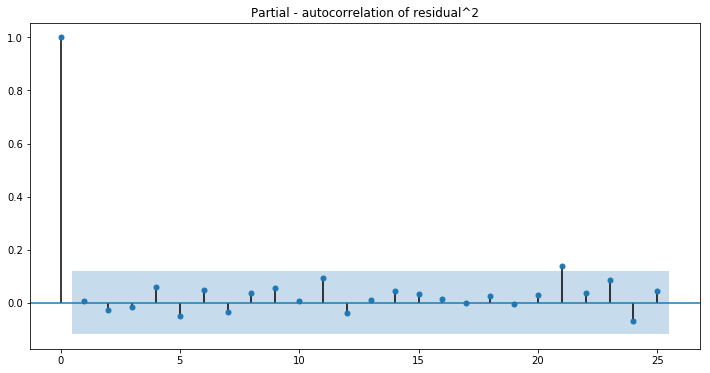

In [ ]:
#Plotting the square of the residuals
plot_acf(sarimabitcoinreturnsfit.resid**2, title='Autocorrelation of residual^2');
plot_pacf(sarimabitcoinreturnsfit.resid**2, title='Partial - autocorrelation of residual^2');

In [ ]:
sm.stats.acorr_ljungbox(sarimabitcoinreturnsfit.resid**2, lags=15, return_df=True)

,lb_stat,lb_pvalue
1,0.012782,0.909984
2,0.232310,0.890337
3,0.298776,0.960259
4,1.229908,0.873150
5,1.907419,0.861801
6,2.456623,0.873290
7,2.765250,0.905836
8,3.165793,0.923526
9,3.830150,0.922232
10,3.898258,0.951820


## GARCH model ##
### We notice that the GARCH(1,1) model works best with a decent AIC score and omega, alpha, beta values having significant p-values ###


In [ ]:
garchbitcoinreturnfit = arch.arch_model(sarimabitcoinreturnsfit.resid**2, p=1, q=1, vol='Garch', mean='constant').fit()
garchbitcoinreturnfit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24373795105.10733
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1334.7802309659332
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1334.7802309120757
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                1334.78
Distribution:                  Normal   AIC:                          -2661.56
Method:            Maximum Likelihood   BIC:                          -2647.11
                                        No. Observations:                  274
Date:                Mon, Jan 25 2021   Df Residuals:                      270
Time:                        15:15:51   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.5642e-04  5.670e-07   1510.560      0.000 [8.553e-04,8.575e-04]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.7012e-06  1.281e-10  1.328e+04      0.000  [1.701e-06,1.701e-06]
alpha[1]       0.0100  2.580e-02      0.388      0.698 [-4.058e-02,6.058e-02]
beta[1]        0.4900      0.139      3.533  4.111e-04      [  0.218,  0.762]
=============================================================================

Covariance estimator: robust
"""

### GARCH unconditional variance ###

In [ ]:
garchbitcoinreturnfit.params[1]/(1-(garchbitcoinreturnfit.params[2]+garchbitcoinreturnfit.params[3]))

3.4024607960657214e-06

## EGARCH ##

### We implement a symettrical EGARCH instead of standard EGARCH due to failure of convergence ###


In [ ]:
egarchbitcoinreturnfit = arch.arch_model(sarimabitcoinreturnsfit.resid**2, p=1, q=1, o=0, vol='EGARCH').fit()
egarchbitcoinreturnfit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.2257599460785213e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 693.192925581352
Iteration:      3,   Func. Count:     27,   Neg. LLF: 11011230881.610321
Iteration:      4,   Func. Count:     34,   Neg. LLF: 273617576.4869466
Iteration:      5,   Func. Count:     40,   Neg. LLF: 220908403.20027763
Iteration:      6,   Func. Count:     46,   Neg. LLF: 217770190.19205627
Iteration:      7,   Func. Count:     52,   Neg. LLF: 217918998.805965
Iteration:      8,   Func. Count:     58,   Neg. LLF: 218494294.48045754
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1359.0318432131521
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1358.0862399527334
Iteration:     11,   Func. Count:     75,   Neg. LLF: -1355.6342654753876
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1359.5678425148271
Iteration:     13,   Func. Count:     87,   Neg. LLF: -1359.918275148977
Iteration:     14,   Func. Count:     92,   Neg.

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.010
Mean Model:             Constant Mean   Adj. R-squared:                 -0.010
Vol Model:                     EGARCH   Log-Likelihood:                1359.93
Distribution:                  Normal   AIC:                          -2711.87
Method:            Maximum Likelihood   BIC:                          -2697.41
                                        No. Observations:                  274
Date:                Mon, Jan 25 2021   Df Residuals:                      270
Time:                        15:15:56   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.6791e-04  2.281e-05     29.284 1.645e-188 [6.232e-04,7.126e-04]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         -4.0938      0.822     -4.981  6.339e-07 [ -5.705, -2.483]
alpha[1]      -0.5917      0.195     -3.038  2.385e-03 [ -0.974, -0.210]
beta[1]        0.6907  6.251e-02     11.051  2.178e-28 [  0.568,  0.813]
========================================================================

Covariance estimator: robust
"""

### EGARCH unconditional variance ###

In [ ]:
egarchbitcoinreturnfit.params[1]/(1-(egarchbitcoinreturnfit.params[2]+egarchbitcoinreturnfit.params[3]))

-4.54372289077011

## TGARCH ##

### We use Power = 1 and assume a normal distribution ###


In [ ]:
tgarchbitcoinreturnfit = arch.arch_model(sarimabitcoinreturnsfit.resid**2, p=1, q=1, o=1, power=1).fit()
tgarchbitcoinreturnfit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3430706332.986504
Iteration:      2,   Func. Count:     21,   Neg. LLF: 209.08043185547598
Iteration:      3,   Func. Count:     30,   Neg. LLF: -1243.6297980232448
Iteration:      4,   Func. Count:     37,   Neg. LLF: -1246.1568618405681
Iteration:      5,   Func. Count:     44,   Neg. LLF: -1249.3420921969298
Iteration:      6,   Func. Count:     51,   Neg. LLF: 384409499995975.56
Iteration:      7,   Func. Count:     65,   Neg. LLF: 217070.0811683227
Iteration:      8,   Func. Count:     74,   Neg. LLF: -1068.421857598901
Iteration:      9,   Func. Count:     81,   Neg. LLF: -1094.376171025868
Iteration:     10,   Func. Count:     88,   Neg. LLF: -1181.998609383307
Iteration:     11,   Func. Count:     95,   Neg. LLF: 291386438.94133425
Iteration:     12,   Func. Count:    103,   Neg. LLF: -984.5363542048494
Iteration:     13,   Func. Count:    113,   Neg. LLF: 107966073.42120793
Iteration:     14,   Func. Count:    127,   Neg. L

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                1337.43
Distribution:                  Normal   AIC:                          -2664.86
Method:            Maximum Likelihood   BIC:                          -2646.79
                                        No. Observations:                  274
Date:                Mon, Jan 25 2021   Df Residuals:                      269
Time:                        15:15:59   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.4978e-04  1.867e-04      4.551  5.339e-06 [4.838e-04,1.216e-03]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega       2.8010e-04  1.684e-04      1.663  9.631e-02 [-5.001e-05,6.102e-04]
alpha[1]    4.8241e-13  9.354e-02  5.157e-12      1.000      [ -0.183,  0.183]
gamma[1]   -1.1915e-10      0.400 -2.977e-10      1.000      [ -0.784,  0.784]
beta[1]         0.8494  6.376e-02     13.322  1.729e-40      [  0.724,  0.974]
==============================================================================

Covariance estimator: robust
"""

### TGARCH unconditional variance ###

In [ ]:
tgarchbitcoinreturnfit.params[1]/(1-(tgarchbitcoinreturnfit.params[2]+tgarchbitcoinreturnfit.params[3]))

0.0002800976180981214

## IGARCH ##
## Implemeting an IGARCH model ##

In [ ]:

igarchbitcoinreturnfit = arch.arch_model(sarimabitcoinreturnsfit.resid**2, vol='FIGARCH', p =1, q=1, power=1, rescale=True).fit()
igarchbitcoinreturnfit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2283.9718757910905
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1294.590391530127
Iteration:      3,   Func. Count:     25,   Neg. LLF: 565.6379866664829
Iteration:      4,   Func. Count:     31,   Neg. LLF: 567.4474924398278
Iteration:      5,   Func. Count:     38,   Neg. LLF: 559.1407927370777
Iteration:      6,   Func. Count:     44,   Neg. LLF: 556.9289099337653
Iteration:      7,   Func. Count:     50,   Neg. LLF: 556.678274928524
Iteration:      8,   Func. Count:     56,   Neg. LLF: 556.5709313103711
Iteration:      9,   Func. Count:     62,   Neg. LLF: 556.5499148374661
Iteration:     10,   Func. Count:     68,   Neg. LLF: 556.545636808848
Iteration:     11,   Func. Count:     74,   Neg. LLF: 556.545514084597
Iteration:     12,   Func. Count:     80,   Neg. LLF: 556.5455121995763
Iteration:     13,   Func. Count:     85,   Neg. LLF: 556.5455100475659
Optimization terminated successfully    (Exit mode 0)
            

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -556.546
Distribution:                  Normal   AIC:                           1123.09
Method:            Maximum Likelihood   BIC:                           1141.16
                                        No. Observations:                  274
Date:                Mon, Jan 25 2021   Df Residuals:                      269
Time:                        15:16:03   Df Model:                            5
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.8510      0.102      8.316  9.073e-17 [  0.650,  1.052]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.7012      0.932      1.825  6.805e-02      [ -0.126,  3.529]
phi            0.5000      0.159      3.142  1.677e-03      [  0.188,  0.812]
d          1.1137e-09  3.024e-02  3.683e-08      1.000 [-5.927e-02,5.927e-02]
beta           0.5000      0.159      3.142  1.677e-03      [  0.188,  0.812]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Gold ETF
pvalgoldetf = round(adfuller(df_goldetf['Close'].loc['Apr-2020':'Dec-2020'])[1],5)
if (pvalgoldetf>0.05):
    print('The value of p is not significant with value being {} and \nhence we cannot reject the null hypothesis that a unit root exists and the data is non-stationary'.format(pvalgoldetf))
else:
    print('The value of p is significant with value being {} and \nhence we reject the null hypothesis\nThus, the unit root does not exists and the data is stationary'.format(pvalgoldetf))
    
    
#Using KPSS Test for stationarity test
'''
H0: Data is stationary/n
H1: Data is not stationary
'''
#Testing the stationarity of the Gold ETF
kpsspvaluegoldetf = kpss(df_goldetf['Close'].loc['Apr-2020':'Dec-2020'])[1]
if (kpsspvaluegoldetf>0.05):
    print('The value of kpss p is not significant with value being {} and \nhence we cannot reject the null hypothesis. \nThus series is stationary'.format(kpsspvaluegoldetf))
else:
    print('The value of kpss p is significant with value being {} and \nhence we reject the null hypothesis\nThus series is not-stationary with a deterministic trend'.format(kpsspvaluegoldetf))

The value of p is not significant with value being 0.12051 and 
hence we cannot reject the null hypothesis that a unit root exists and the data is non-stationary
The value of kpss p is significant with value being 0.01 and 
hence we reject the null hypothesis
Thus series is not-stationary with a deterministic trend


In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Equity ETF
pvalequityetf = round(adfuller(df_equityetf['Close'].loc['Apr-2020':'Dec-2020'])[1],5)
if (pvalequityetf>0.05):
    print('The value of p is not significant with value being {} (>0.05) and \nhence we cannot reject the null hypothesis that a unit root exists and the data is non-stationary'.format(pvalequityetf))
else:
    print('The value of p is significant with value being {} and \nhence we reject the null hypothesis\nThus, the unit root does not exists and the data is stationary'.format(pvalequityetf))
    
#Using KPSS Test for stationarity test
'''
H0: Data is stationary/n
H1: Data is not stationary
'''
#Testing the stationarity of the Equity ETF
kpsspvalueequityetf = kpss(df_equityetf['Close'].loc['Apr-2020':'Dec-2020'])[1]
if (kpsspvalueequityetf>0.05):
    print('The value of kpss p is not significant with value being {} and \nhence we cannot reject the null hypothesis. \nThus series is stationary with a deterministic trend'.format(kpsspvalueequityetf))
else:
    print('The value of kpss p is significant with value being {} and \nhence we reject the null hypothesis\nThus series is non-stationary with a deterministic trend'.format(kpsspvalueequityetf))

The value of p is significant with value being 0.03825 and 
hence we reject the null hypothesis
Thus, the unit root does not exists and the data is stationary
The value of kpss p is not significant with value being 0.09174892316842467 and 
hence we cannot reject the null hypothesis. 
Thus series is stationary with a deterministic trend


In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Bitcoin-USD 
pvalbitcoin = round(adfuller(df_bitcoin['Close'].loc['Apr-2020':'Dec-2020'])[1],5)
if (pvalbitcoin>0.05):
    print('The value of p is not significant with value being {} and \nhence we cannot reject the null hypothesis that a unit root exists and the data is non-stationary'.format(pvalbitcoin))
else:
    print('The value of p is significant with value being {} and \nhence we reject the null hypothesis\nThus, the unit root does not exists and the data is stationary'.format(pvalbitcoin))


#Using KPSS Test for stationarity test
#Testing the stationarity of the Bitcoin -USD ETF
kpsspvaluebitcoin = kpss(df_bitcoin['Close'].loc['Apr-2020':'Dec-2020'])[1]
if (kpsspvaluebitcoin>0.05):
    print('The value of kpss p is not significant with value being {} and \nhence we cannot reject the null hypothesis. \nThus series is stationary with a deterministic trend'.format(kpsspvaluebitcoin))
else:
    print('The value of kpss p is significant with value being {} and \nhence we reject the null hypothesis\nThus series is not-stationary with a deterministic trend'.format(kpsspvaluebitcoin))

The value of p is not significant with value being 1.0 and 
hence we cannot reject the null hypothesis that a unit root exists and the data is non-stationary
The value of kpss p is significant with value being 0.01 and 
hence we reject the null hypothesis
Thus series is not-stationary with a deterministic trend


## Below we are performing a seasonality decomposition of all the asset types to identify trends which we can potentially use for ADF or KPSS tests ##

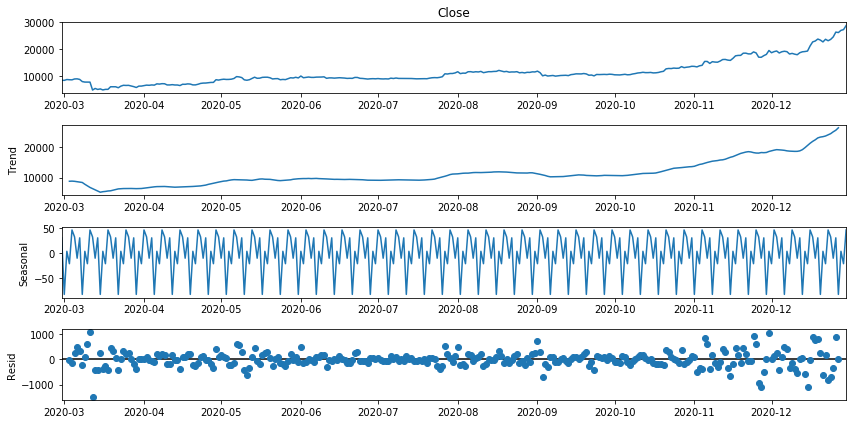

In [ ]:
seasonal_decompose(df_bitcoin['Close']).plot();

### Performing ADF and KPSS Test on the daily prices of the 3 securities for Q1 2020 ###

In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Gold ETF
print ('ADF p-value for Gold ETF:',round(adfuller(df_goldetf['Close'].loc['Apr-2020':'Jun-2020'], regression = 'ct')[1],5)) #Non-stationary
print ('KPSS p-value for Gold ETF:',round(kpss(df_goldetf['Close'].loc['Apr-2020':'Jun-2020'], regression = 'ct')[1],5)) #Stationary

ADF p-value for Gold ETF: 0.37066
KPSS p-value for Gold ETF: 0.1


In [ ]:
#Using ADF Test to test the stationarity
#Using ADF Test to test the stationarity
#Testing the stationarity of the Gold ETF
print ('ADF p-value for Equity ETF:',round(adfuller(df_equityetf['Close'].loc['Apr-2020':'Jun-2020'], regression = 'ct')[1],5)) #Non-stationary
print ('KPSS p-value for Equity ETF:',round(kpss(df_equityetf['Close'].loc['Apr-2020':'Jun-2020'], regression = 'ct')[1],5)) #Stationary

ADF p-value for Equity ETF: 0.0335
KPSS p-value for Equity ETF: 0.1


In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Gold ETF
print ('ADF p-value for Bitcoin USD ETF:',round(adfuller(df_bitcoin['Close'].loc['Apr-2020':'Jun-2020'], regression = 'ct')[1],5)) #Non-stationary
print ('KPSS p-value for Bitcoin ETF:',round(kpss(df_bitcoin['Close'].loc['Apr-2020':'Jun-2020'], regression = 'ct')[1],5)) #Non-stationary

ADF p-value for Bitcoin USD ETF: 0.70306
KPSS p-value for Bitcoin ETF: 0.02359


### In the cell immediately below we are performing a join so that we have the prices for the same days given that we had records for weekends for the Bitcoin-USD while we did not have data for the Equity and Gold ETF. Thus the engle granger analysis must be performed on the same set of records ##

In [ ]:
dfb = pd.DataFrame(data = df_bitcoin['Close'])
dfb.columns = ['Bitcoin Closing Price']
dfe = pd.DataFrame(data = df_equityetf['Close'])
dfe.columns = ['Equity ETF Closing Price']
dfg = pd.DataFrame(data = df_goldetf['Close'])
dfg.columns = ['Gold ETF Closing Price']
df_close = dfg.join(dfb.join(dfe, how = 'inner'), how='inner')
df_close.head()

,Gold ETF Closing Price,Bitcoin Closing Price,Equity ETF Closing Price
Date,,,
2020-03-02,149.20,8869.67,10100.0
2020-03-03,153.89,8787.79,10176.0
2020-03-04,154.16,8755.25,10332.0
2020-03-05,157.49,9078.76,10231.0
2020-03-06,157.55,9122.55,9854.0


In [ ]:
#Since Equity ETF is stationary, we cannot perform an Engle-Granger test for Gold ETF with other securities
#Hence we can perform an engle granger of Bitcoin-USD with GoldETF where both have the differencing of 1

from arch.unitroot import engle_granger
egq2bitcoingold = engle_granger(df_close['Bitcoin Closing Price'].loc['Apr-2020':'Jun-2020'],df_close['Gold ETF Closing Price'].loc['Apr-2020':'Jun-2020'], trend='ctt')
egq2bitcoingold

Test Statistic,-4.501
P-value,0.019
ADF Lag length,0
Estimated Root ρ (γ+1),0.489


# Co-integration Vectors for Quadratic trend VECM - Bitcoin and Gold

**The high volatility of bitcoin-usd secutity is offset by the gold etf which is less volatile and thus its has a higher co-efficient in the co-integration equation**

In [ ]:

egq2bitcoingold.cointegrating_vector


Bitcoin Closing Price         1.000000
Gold ETF Closing Price       49.653896
const                    -13760.477949
trend                      -170.071445
quadratic_trend               1.819440
dtype: float64

# Summary of finding based on analysis of Q2 data for Equity ETF, Gold ETF and Bitcoin USD #

This is because of the following reasons:
1. Equity ETF is **trend stationary**. Thus, Gold ETF cannot be used for co-integration with either Equity ETF or Bitcoin-USD
2. The p-value of the co-integration test between Gold ETF and Bitcoin-USD is significant for a **quadratic trend**. Thus, we **reject the null hypothesis of non cointegration**

In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Gold ETF
print ('ADF p-value for Gold ETF:',round(adfuller(df_goldetf['Close'].loc['Jul-2020':'Sep-2020'], regression = 'ct')[1],5)) #Non-stationary
print ('KPSS p-value for Gold ETF:',round(kpss(df_goldetf['Close'].loc['Jul-2020':'Sep-2020'], regression = 'ct')[1],5)) #Non-Stationary

ADF p-value for Gold ETF: 0.8281
KPSS p-value for Gold ETF: 0.04086


In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Equity ETF
print ('ADF p-value for Equity ETF:',round(adfuller(df_equityetf['Close'].loc['Jul-2020':'Sep-2020'], regression = 'ct')[1],5)) #Non-stationary
print ('KPSS p-value for Equity ETF:',round(kpss(df_equityetf['Close'].loc['Jul-2020':'Sep-2020'], regression = 'ct')[1],5)) #Non-Stationary

ADF p-value for Equity ETF: 0.04956
KPSS p-value for Equity ETF: 0.1


In [ ]:
#Using ADF Test to test the stationarity
#Testing the stationarity of the Bitcoin ETF
print ('ADF p-value for Bitcoin USD ETF:',round(adfuller(df_bitcoin['Close'].loc['Jul-2020':'Sep-2020'], regression = 'ct')[1],5)) #Non-stationary
print ('KPSS p-value for Bitcoin ETF:',round(kpss(df_bitcoin['Close'].loc['Jul-2020':'Sep-2020'], regression = 'ct')[1],5)) #Non-stationary

ADF p-value for Bitcoin USD ETF: 0.83696
KPSS p-value for Bitcoin ETF: 0.02365


### All the time series are non-stationary for Q3 and thus we can run the Engle Granger on all the pairs of value ###

### Engle Granger for Bitcoin-USD and Gold ETF for Q3 2020 ###

In [ ]:
egq3bitcoingold = engle_granger(df_close['Bitcoin Closing Price'].loc['Jul-2020':'Sep-2020'],df_close['Gold ETF Closing Price'].loc['Jul-2020':'Sep-2020'], trend='ct')
egq3bitcoingold
#The results depict no-cointegration

Test Statistic,-2.393
P-value,0.581
ADF Lag length,0
Estimated Root ρ (γ+1),0.811


### Engle Granger for Bitcoin-USD and Equity ETF for Q3 2020 ###

In [ ]:
#The results of Engle Granger test shows no-cointegration
egq3bitcoinequity = engle_granger(df_close['Bitcoin Closing Price'].loc['Jul-2020':'Sep-2020'],df_close['Equity ETF Closing Price'].loc['Jul-2020':'Sep-2020'], trend='c')
egq3bitcoinequity

Test Statistic,-2.104
P-value,0.472
ADF Lag length,0
Estimated Root ρ (γ+1),0.861


### Engle Granger for Gold ETF and Equity ETF for Q3 2020 ###

In [ ]:
egq3goldequity = engle_granger(df_close['Gold ETF Closing Price'].loc['Jul-2020':'Sep-2020'],df_close['Equity ETF Closing Price'].loc['Jul-2020':'Sep-2020'], trend= 'n')
egq3goldequity

Test Statistic,-1.906
P-value,0.274
ADF Lag length,0
Estimated Root ρ (γ+1),0.907


### Q. 7.7 - If any 2 sets are cointegrated, Do the results from Quarter 2 cointegration testing help predict the coefficients from Quarter 3 cointegration? We do not notice any cointegration in Q3 for any of the security pairs ###

The Q2 cointegration results did not help in any way to identify the Q3 cointegration results. As mentioned by the facuty, i will now run a VAR model on the **stationary time series of the asset returns**

# VAR Model on Asset Returns #

In [ ]:
df_all_returns = df_bitcoin_daily_return.join(pd.DataFrame(df_equityetf_daily_return).join(df_goldetf_daily_return, how='inner'), how='inner')

In [ ]:
print('ADF test p-value for Bitcoin return: ',round(adfuller(df_all_returns['Bitcoin-USD daily Returns'])[1],7))
print('ADF test p-value for Equity return: ', round(adfuller(df_all_returns['Equity ETF Daily Returns'])[1],7))
print('ADF test p-value for Bitcoin return: ',round(adfuller(df_all_returns['Gold ETF Daily Returns'])[1],7))

ADF test p-value for Bitcoin return:  0.0
ADF test p-value for Equity return:  0.0
ADF test p-value for Bitcoin return:  6.44e-05


In [ ]:
from statsmodels.tsa.api import VAR
aic = 1000
var_model = VAR(df_all_returns.loc['Apr-2020':'Nov-2020'])
for lag in range(50):
    score = var_model.fit(lag).aic
    #print('The VAR model for the 3 dimensional timeseries has the aic score as {} with lags of {}'.format(score,lag))
    if(score<aic):
        aic = score
        p = lag
      
print('The VAR model for the 3 dimensional timeseries has the best aic score as {} with lags of {}'.format(round(aic,2),p))

The VAR model for the 3 dimensional timeseries has the best aic score as -216.44 with lags of 42


**The VAR model for the 3 dimensional timeseries has the best aic score as -217.5 with lags of 42**

In [ ]:
var_model.fit(p).summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Jan, 2021
Time:                     15:54:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -205.562
Nobs:                     86.0000    HQIC:                  -212.059
Log likelihood:           9321.63    FPE:               -2.00488e-96
AIC:                     -216.435    Det(Omega_mle):    -1.31961e-97
--------------------------------------------------------------------
Results for equation Bitcoin-USD daily Returns
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                 0.003373              NAN              NAN             NAN
L1.Bitcoin-USD daily Returns          0.047052              NAN          